In [2]:
import xarray as xr
rttov_path = '/work/bb1036/rttov_share/rttov-131-36-channels-05022013-07182022.nc'
    # rttov_variable_ds = read_data_refl_emiss_rttov(rttov_path)
rttov_ds = xr.open_dataset(rttov_path).compute()  # write read rttov in a function


In [3]:
rttov_ds

<xarray.Dataset>
Dimensions:          (Longitude: 589, Latitude: 628, Channel: 36)
Coordinates:
  * Longitude        (Longitude) float32 4.5 4.517 4.534 ... 14.46 14.48 14.5
  * Latitude         (Latitude) float32 47.6 47.61 47.62 ... 54.47 54.49 54.5
  * Channel          (Channel) float32 1.0 2.0 3.0 4.0 ... 33.0 34.0 35.0 36.0
Data variables:
    BRF_total        (Channel, Latitude, Longitude) float32 0.07597 ... 0.0
    BRF_clear        (Channel, Latitude, Longitude) float32 0.07597 ... 0.0
    BT_total         (Channel, Latitude, Longitude) float32 0.0 0.0 ... 225.5
    BT_clear         (Channel, Latitude, Longitude) float32 0.0 0.0 ... 225.5
    Radiance_total   (Channel, Latitude, Longitude) float32 30.85 ... 2.332
    Radiance_clear   (Channel, Latitude, Longitude) float32 30.85 ... 2.332
    Radiance_cloudy  (Channel, Latitude, Longitude) float32 1.283 ... 47.11
    BRDF             (Channel, Latitude, Longitude) float32 0.02048 ... 0.0
    Emissivity       (Channel, Latitude, Longitude) float32 0.0 0.0 ... 0.9578
    iwp_ret          (Latitude, Longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    iwp_model        (Latitude, Longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [10]:
# rttov_ds['BRF_total']

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rttov_variable = np.zeros((np.shape(rttov_ds['Radiance_total'].values)))

rttov_variable[:19] = rttov_ds['BRF_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable[19:25] = rttov_ds['Radiance_total'][19:25]
rttov_variable[25] = rttov_ds['BRF_total'][19] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable[26:36] = rttov_ds['Radiance_total'][26:36]
rttov_variable_ds = xr.DataArray( rttov_variable[:], dims=['Channel','Latitude','Longitude'], coords= [rttov_ds.Channel.data, rttov_ds.Latitude.data, rttov_ds.Longitude.data ])


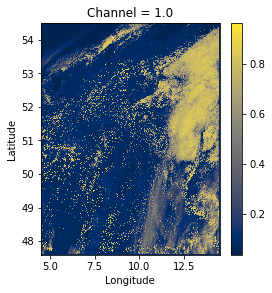

In [15]:

fig = plt.figure(figsize=(4, 1.066*4))
rttov_variable_ds[0].plot(cmap = "cividis") #, vmin=2, vmax = 800) 

In [38]:
    X_data = rttov_variable_ds.values
    R = X_data[0, :, ] / np.max(X_data[0, :, ])  # 1,3,4 = 0,1,2 then change for it when 0,2,3
    G = X_data[3, :, ] / np.max(X_data[2, :, ])
    B = X_data[2, :, ] / np.max(X_data[1, :, ])



In [ ]:
#     R = np.clip(R, 0, 1)
#     G = np.clip(G, 0, 1)
#     B = np.clip(B, 0, 1)

#     gamma = 2.2
#     R = np.power(R, 1 / gamma)
#     G = np.power(G, 1 / gamma)
#     B = np.power(B, 1 / gamma)

#     # Calculate the "True" Green
#     # G_true = 0.48358168 * R + 0.45706946 * B + 0.06038137 * G
#     G_true = 0.45 * R + 0.1 * G + 0.45 * B
#     G_true = np.clip(G_true, 0, 1)

#     # The final RGB array :)
#     RGB = np.dstack([R, G_true, B])

In [ ]:
RGB = np.dstack([R, G, B])

print("RGB",np.shape(RGB))


along_track = np.shape(RGB)[0] 
cross_trak = np.shape(RGB)[1] 
z = RGB

rgb = np.zeros((along_track, cross_trak,3))

norme = 0.6#0.4 # factor to increase the brightness ]0,1]

rgb = z / norme

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

z =rgb

z_color_enh = np.zeros((along_track, cross_trak,3), dtype=np.uint8)

x = np.array([0,  30,  60, 120, 190, 255], dtype=np.uint8)
y = np.array([0, 110, 160, 210, 240, 255], dtype=np.uint8)

z_color_enh[:,:,0] = scale_image(bytescale(z[:,:,0]), x, y)
z_color_enh[:,:,1] = scale_image(bytescale(z[:,:,1]), x, y)
z_color_enh[:,:,2] = scale_image(bytescale(z[:,:,2]), x, y)
print( np.max(z_color_enh)  )

z_color_enh = z_color_enh/256

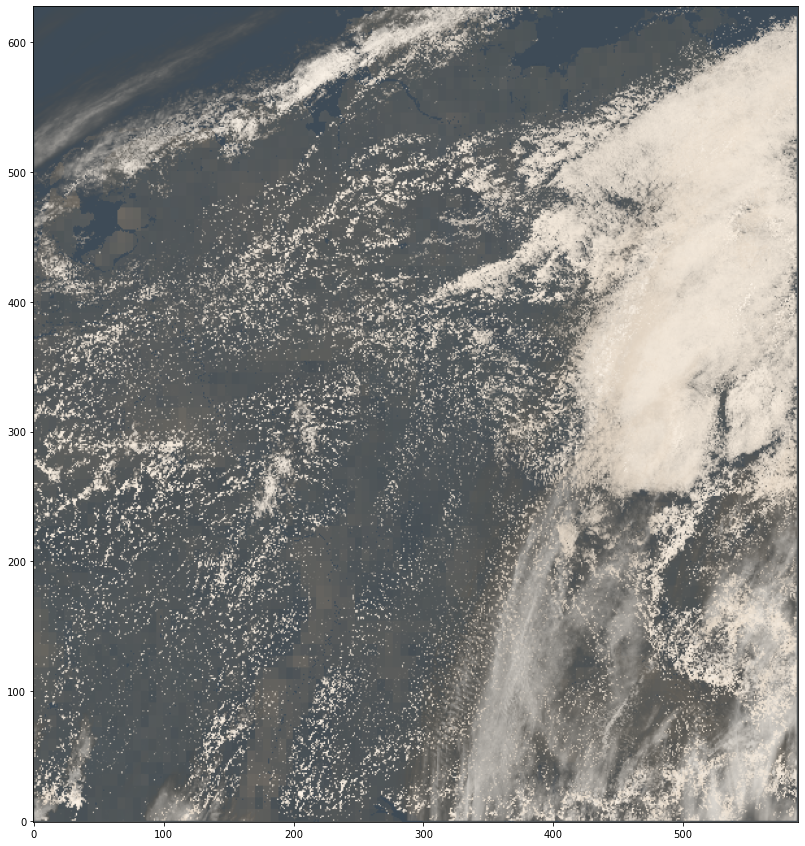

In [37]:
fig = plt.figure(figsize=(20, 15))
plt.imshow(RGB, origin='lower')

In [32]:
# rttov_variable_ds

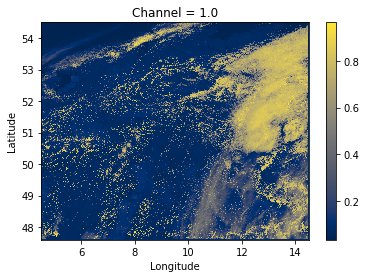

In [35]:
rttov_variable_ds[0].plot(cmap='cividis') #, vmin=0, vmax=0.65) 

In [48]:
# for i in (rttov_ds.Channel.values):
#     print(int(i))

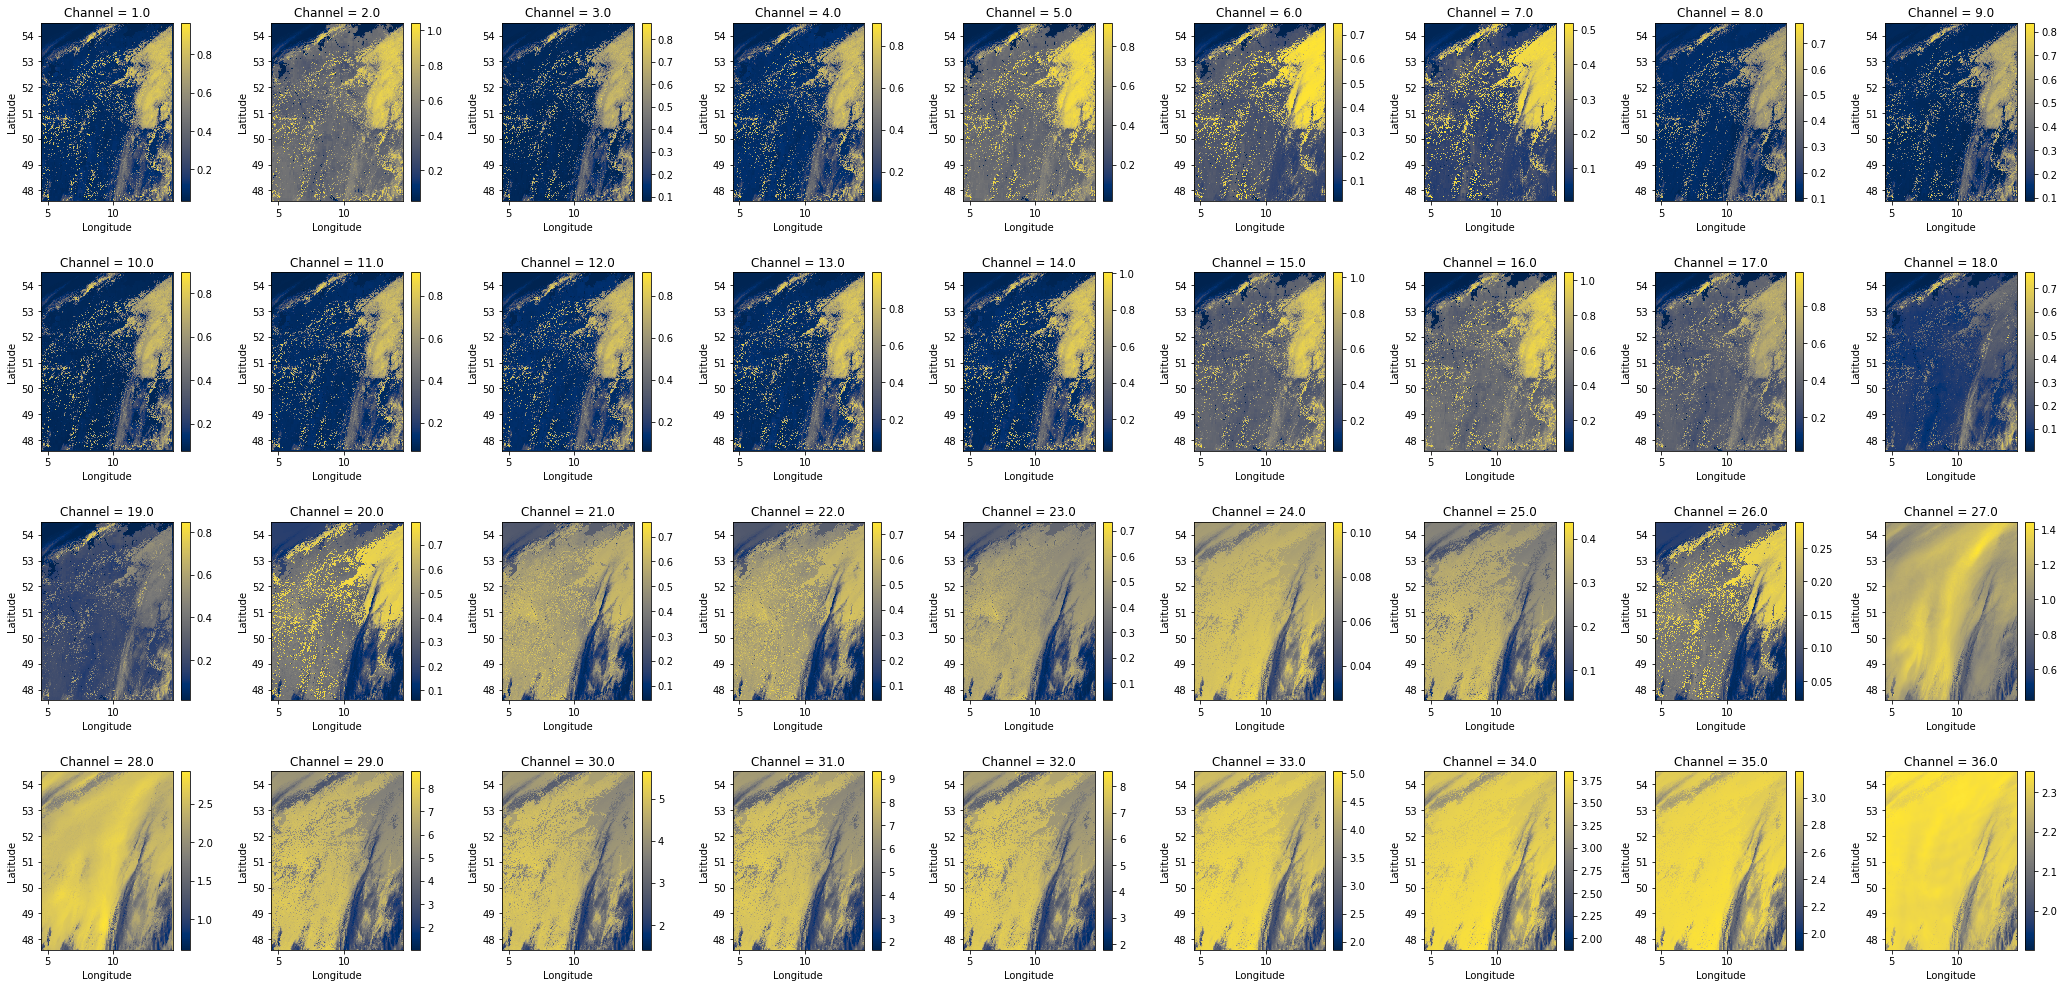

In [47]:
f, axes = plt.subplots(4,9,figsize=(4*9, 4*4*1.066)) #width of 15 inches and 7 inches in height.


f.subplots_adjust(wspace=0.4, hspace=0.4)


axli = axes.ravel()

for i in rttov_variable_ds.Channel.values:
    i =int(i)
    rttov_variable_ds[i-1].plot(cmap='cividis', ax = axli[i-1]) #, vmin=0, vmax=0.65) 



In [59]:
import xarray as xr

timestep = "20"
ds_3D = xr.open_dataset("/work/bb1036/b381362/dataset_icon/3d_coarse_day_ll_DOM03_ML_20130502T{}0000Z.nc".format(timestep))
ds_2D = xr.open_dataset("/work/bb1036/b381362/dataset_icon/2d_cloud_day_DOM03_ML_20130502T{}0000Z.nc".format(timestep))

time_3D = ds_3D.time.values # lat,lot
time_2D = ds_2D.time.values # lat,lot

In [60]:
(time_2D.size)/(time_3D.size)

1.0

8-19 h(12 timestep), 20h only 1 timestep (12*12+1 = 145)

In [61]:
for index, value in enumerate(time_3D):
    print(f"'{index+1}'<= {value}")

'1'<= 20130502.833333332


In [62]:
for index, value in enumerate(time_2D):
    print(f"'{index+1}'<= {value}") #each 5 point a 3D

'1'<= 20130502.833333332


In [26]:
ds_3D.ta

<xarray.DataArray 'ta' (time: 12, height: 150, lat: 637, lon: 589)>
[675347400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
  * lat      (lat) float64 47.5 47.51 47.52 47.53 ... 54.46 54.47 54.48 54.5
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 147.0 148.0 149.0 150.0
  * time     (time) float64 2.013e+07 2.013e+07 ... 2.013e+07 2.013e+07
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    param:          0.0.0

In [9]:
ds = ds_3D.sel(time="20130502.833333332")

In [10]:
import numpy as np

In [12]:
!cdo -P 8 remapnn,/home/b/b381362/github/ICON_RTTOV/ICON_input/myGridDef -setgrid,/work/bb1036/b381362/dataset_icon/hdcp2_de_default_nest_R0156m.nc -selname,clwvi /work/bb1036/b381362/dataset_icon/2d_cloud_day_DOM03_ML_20130502T200000Z.nc /work/bb1036/b381362/dataset/data_test.nc  

cdo(1) setgrid: Process started
cdo(2) selname: Process started
cdo    remapnn: Nearest neighbor weights from unstructured (22282304) to lonlat (589x637) grid
cdo    remapnn:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 810cdo(2) selname: Processed 22282304 values from 22 variables over 1 timestep.
cdo(1) setgrid: Processed 22282304 values from 1 variable over 1 timestep.
cdo    remapnn: Processed 22282304 values from 1 variable over 1 timestep [9.99s 8132MB].


In [14]:
ds_clwvi = xr.open_dataset("/work/bb1036/b381362/dataset/data_test.nc")


In [15]:
    ds_3D
    T_c =  np.float64(ds.ta) - 273.15
    esat_2013 = 0.611* np.exp((17.3*T_c)/(T_c+237.3))*1000.0
    #esat_2013 = np.ma.masked_array(esat_2013,  esat_2013 == 0) ## check it!!!!!!!!
    pres = np.ma.masked_array(ds.pres,  ds.pres == 0) ## check it!!!!!!!!
    qs_2013 =  0.622* (esat_2013/pres) #this is diffent compared with Alexandre code
    r_2013 = ds.hus/(1 - ds.hus)
    RH_2013 = 100*(r_2013/qs_2013)
    pv_2013 = (esat_2013 * RH_2013)/100.0
    pd_2013 = ds.pres - pv_2013
    rho_2013 = (pd_2013/(287.058 * ds.ta)) + (pv_2013/(461.495 * ds.ta))  #nana
    cdnc_2013_cm = (rho_2013 * ds.qnc)/1000000 # convert to cm^-3


    lwp = ds_clwvi.clwvi*1000 #ds.clwvi*1000

    Nd_max = np.nanmax(cdnc_2013_cm, axis = 0)
  

/tmp/ipykernel_248836/2451353400.py:17: RuntimeWarning: All-NaN axis encountered
  Nd_max = np.nanmax(cdnc_2013_cm, axis = 0)


In [12]:
# !ncdump -v time /work/bb1036/b381362/dataset_icon/3d_coarse_day_ll_DOM03_ML_20130502T090000Z.nc 

In [24]:
# !ncdump -v time /work/bb1036/b381362/dataset_icon/2d_cloud_day_DOM03_ML_20130502T120000Z.nc 

In [17]:
    var_Nd = Nd_max # lat,lot
    var_LWP = lwp.values # lat,lot

In [19]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [22]:
# file_name = os.path.splitext(os.path.basename(fname))[0][:-5]  # os.path.splitext(fname)[0][:-5] with path
file_name= "plot_test" + timestep 


Nd_max min, max nan nan
LWP min, max 0.0 7342.5586


AttributeError: 'Rectangle' object has no property 'cmap'

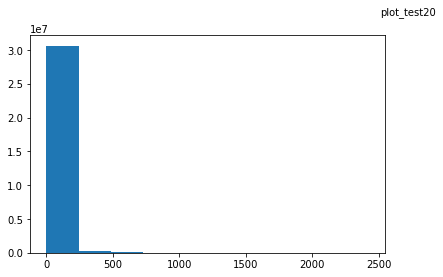

In [24]:
    x_Nd = var_Nd.flatten()
    y_lwp = var_LWP.flatten()

    #####################1 ###
    # fig = plt.figure(figsize=(3, 5))
    print("Nd_max min, max", x_Nd.min(), np.max(x_Nd))
    print("LWP min, max", y_lwp.min(), np.max(y_lwp))

    fig = plt.figure(figsize=(14, 4))
    fig.suptitle(file_name, fontsize=10)

    plt.subplot(121)
    # ds.Nd_max[:, :].where(var_Nd > 0).plot(cmap="cividis")  # ,
    cdnc_2013_cm.where(var_Nd > 0).plot(cmap="cividis") 
    plt.subplot(122)
    ds.lwp[:, :].where(var_LWP > 0).plot(cmap="cividis")  # ,
    figure_name = '{}_LWP_Nd.png'.format(os.sep.join([path_output,file_name]))


    plt.show()
    fig.savefig(figure_name)
    
    #####################2 ###
    fig = plt.figure(figsize=(14, 4))
    fig.suptitle(file_name, fontsize=10)

    plt.subplot(121)
    ds.lwp.where(ds.lwp != 0).plot(cmap = "cividis",vmin=2, vmax = 1200)
    plt.subplot(122)
    ds.Nd_max.where(ds.Nd_max != 0).plot(cmap = "cividis",vmin=2, vmax = 800)
    figure_name = os.sep.join([args.path_out,file_name +'_LWP2-1200-Nd2-800.png'])

    print(figure_name)
    fig.savefig(figure_name)
    plt.show()
    ##########################
    # count_0

    print(" ============== Nd_max =================")
    arr = x_Nd
    count_no_zeros = np.count_nonzero(arr)
    print(f"number of non-zero: {count_no_zeros}")
    count_zeros = arr.size - np.count_nonzero(arr)
    print(f"number of zeros: {count_zeros}")
    print( f"percent of zeros: { count_zeros/count_no_zeros*100} %")

    print(" ============== LWP =================")
    arr = y_lwp
    count_no_zeros = np.count_nonzero(arr)
    print(f"number of non-zero: {count_no_zeros}")
    count_zeros = arr.size - np.count_nonzero(arr)
    print(f"number of zeros: {count_zeros}")
    print( f"percent of zeros: { count_zeros/count_no_zeros*100} %")

    ####################3 ######

    fig = plt.figure(figsize=(14, 6))
    fig.suptitle(file_name, fontsize=10)

    plt.subplot(121)
    with plt.style.context('ggplot'):
        plt.scatter(x_Nd, y_lwp)  #
        plt.ylabel("Nd_max (cm-3) ", fontsize=16)
        plt.xlabel("lwp (gm-2)", fontsize=16)
    
    log_y_lwp = np.log(y_lwp + 1.0e-16)
    log_x_Nd = np.log(x_Nd + 1.0e-16)
    
    plt.subplot(122)
    with plt.style.context('ggplot'):
        plt.scatter(log_x_Nd , log_y_lwp)  #
        plt.xlabel("log Nd_max (cm-3) ", fontsize=16)
        plt.ylabel("log lwp (gm-2)", fontsize=16)
    
    figure_name = '{}_LWP_Nd_values.png'.format(os.sep.join([path_output,file_name]))

    fig.savefig(figure_name)

    plt.show()

    ##########################

    # df = pd.DataFrame({'LWP': log_y_lwp,'Nd': log_x_Nd})

    x = np.ma.masked_array(x_Nd, x_Nd == 0)
    y = np.ma.masked_array(y_lwp, y_lwp == 0)
    df = pd.DataFrame({'LWP': np.log(np.float_(y)), 'Nd': np.log(np.float_(x))})

    count_nan_in_df = df.isnull().sum()
    print("================ values of Nan =====================")
    print (count_nan_in_df)  #can i used 0 in the lwp and nd?
    # print( f"count null: {count_nan_in_df} ")


    # print(df.AI,df.Nd)
    nx = 30
    ny = 35



    jh, x_mid, y_mid, y_median = get_joint_histgram(nx,ny,np.log(5), np.log(1000), np.log(2), np.log(1000),df.Nd,df.LWP)

    p0 = [max(y_median), np.median(x_mid), np.log(1000), min(y_median)]  # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, x_mid, y_median, p0, method='dogbox')
    x0 = np.linspace(x_mid.min(), x_mid.max(), 1000)
    y0 = sigmoid(x0, *popt)


    # definitions for the axes
    left, width = 0.12, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]


    parameters = {'axes.labelsize': 20,
                  'axes.titlesize': 35,
                  'xtick.labelsize':14,
                  'ytick.labelsize':14,
                  }
    plt.rcParams.update(parameters)

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

    # no labels
    ax.tick_params(axis="x", labelbottom=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')

    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])

    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')


    print("+++++print contourf x,y,jh", np.shape(x_mid), np.shape(y_mid), np.shape(jh))
    cs = ax.contourf(x_mid, y_mid, jh, cmap='viridis') #Greys

    fig.colorbar(cs, ax=ax, label='PDF (%)')


    ax.scatter(x_mid, y_median, color='blue', marker='o', s=100)
    ax.plot(x0,y0,color='yellow', label='sigmoid fit', lw=2)



    #PDF plot
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(1000), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    plt.xticks(np.log(np.array([5, 10, 50, 300,1000])),np.array([5, 10, 50, 300,1000]).astype(str))

    figure_name = '{}_relation_LWP-Nd-density-H.png'.format(os.sep.join([path_output,file_name]))
    
    fig.suptitle(file_name, fontsize=10)

    fig.savefig(figure_name)

    # fig.savefig(figure_name)
    plt.show()
#

    count_nan_in_df = df.isnull().sum()
    print("================ values of Nan =====================")
    print (count_nan_in_df)  #can i used 0 in the lwp and nd?
    print( f"count null: {count_nan_in_df} ")
